<a href="https://colab.research.google.com/github/esraregar/Spotify-Tracks-Analysis/blob/main/Spotify_Tracks_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline 
import csv

In [ ]:
tracks = pd.read_csv('/content/data.csv')
#data source: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [ ]:
tracks

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [ ]:
tracks.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
tracks['duration_m'] = tracks['duration_ms']/60000
tracks.drop(['duration_ms','id','release_date'],axis=1,inplace=True)
tracks=tracks[tracks['tempo']>0]

In [ ]:
tracks[tracks.duplicated()]

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_m
2298,0.7700,1933,0.930000,['Billie Holiday'],0.721,0.186,0,0.000145,3,0.3510,-13.833,1,No Regrets - Take 1,17,0.0458,129.452,2.594450
2340,0.9450,1933,0.958000,"['Billie Holiday', 'Teddy Wilson']",0.761,0.420,0,0.037500,10,0.1390,-10.011,1,Spreadin' Rhythm Around (with Teddy Wilson & H...,15,0.1220,95.492,2.894450
18090,0.0985,2012,0.015200,['Kendrick Lamar'],0.587,0.698,1,0.000000,1,0.4420,-8.948,1,"Bitch, Don’t Kill My Vibe",66,0.0943,133.954,5.178667
19464,0.1830,2019,0.604000,['Lewis Capaldi'],0.459,0.575,0,0.000000,3,0.0885,-4.858,1,Before You Go,86,0.0573,111.881,3.585117
19715,0.3490,2020,0.207000,['Lil Mosey'],0.774,0.554,1,0.000000,0,0.1320,-7.909,1,Blueberry Faygo,84,0.0383,99.034,2.709117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160959,0.3850,1972,0.553000,['Curtis Mayfield'],0.472,0.349,0,0.928000,2,0.1340,-7.665,1,Think - Instrumental,20,0.0268,97.505,3.811117
161311,0.7250,1973,0.040600,['Alice Cooper'],0.600,0.761,0,0.000624,2,0.8870,-8.819,1,Raped and Freezin',25,0.0337,123.595,3.321550
164735,0.2630,1991,0.000004,['Nirvana'],0.262,0.969,0,0.002130,4,0.1330,-4.675,1,Breed,30,0.0894,158.433,3.067333
164820,0.1080,1991,0.000144,['Nirvana'],0.285,0.979,0,0.000000,2,0.3340,-4.428,1,Territorial Pissings,28,0.1750,182.700,2.382450


In [ ]:
tracks.drop_duplicates(inplace=True)
tracks.duplicated().sum()

0

In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169945 entries, 0 to 170652
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           169945 non-null  float64
 1   year              169945 non-null  int64  
 2   acousticness      169945 non-null  float64
 3   artists           169945 non-null  object 
 4   danceability      169945 non-null  float64
 5   energy            169945 non-null  float64
 6   explicit          169945 non-null  int64  
 7   instrumentalness  169945 non-null  float64
 8   key               169945 non-null  int64  
 9   liveness          169945 non-null  float64
 10  loudness          169945 non-null  float64
 11  mode              169945 non-null  int64  
 12  name              169945 non-null  object 
 13  popularity        169945 non-null  int64  
 14  speechiness       169945 non-null  float64
 15  tempo             169945 non-null  float64
 16  duration_m        16

In [ ]:
tracks['popularity'].describe()

count    169945.000000
mean         31.520415
std          21.782138
min           0.000000
25%          12.000000
50%          34.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [ ]:
#asumsi tracks dikatakan popular jika popularity>=48 dan tidak popular jika popularity<=12
unpoptr=tracks[tracks['popularity']<=12]
poptr=tracks[tracks['popularity']>=48]

In [ ]:
unpoptr

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_m
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954,13.861117
1,0.9630,1921,0.732,['Dennis Day'],0.819,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936,3.008883
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,5,0.0339,110.339,8.334367
3,0.1650,1921,0.967,['Frank Parker'],0.275,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,3,0.0354,100.109,3.500000
4,0.2530,1921,0.957,['Phil Regan'],0.418,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665,2.778217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170514,0.3950,2020,0.368,['Arijit Singh'],0.571,0.534,0,0.000000,1,0.1300,-6.646,1,Egiye De Reprise,2,0.0281,82.023,3.902433
170515,0.4680,2020,0.340,"['Arijit Singh', 'Shreya Ghoshal']",0.457,0.595,0,0.000000,2,0.0509,-5.223,1,Shudhu Tomari Jonyo Theme,1,0.0337,143.703,3.482800
170516,0.1850,2020,0.245,['Arijit Singh'],0.693,0.725,0,0.000007,2,0.1020,-6.426,1,Hoye Jetey Paari,1,0.0878,123.959,5.209683
170517,0.3940,2020,0.696,['Arijit Singh'],0.420,0.682,0,0.000018,11,0.1620,-6.565,0,Jodi Bolo,0,0.0410,112.009,4.542700


In [ ]:
poptr

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_m
806,0.350,1926,0.82100,['Fats Waller'],0.515,0.222,0,0.001930,0,0.1900,-16.918,0,Ain't Misbehavin',49,0.0575,98.358,3.962883
1206,0.259,1928,0.84700,['Benny Goodman'],0.626,0.744,0,0.892000,2,0.1450,-9.189,0,"Sing, Sing, Sing",51,0.0662,113.117,8.668883
1406,0.713,1929,0.58600,['Louis Armstrong'],0.673,0.377,0,0.000000,0,0.3320,-14.141,1,Mack the Knife,52,0.0697,88.973,3.357783
1606,0.377,1930,0.81100,['Joe Quartz'],0.521,0.364,0,0.009700,6,0.1430,-10.494,0,Monster Faladoré,55,0.0641,95.234,4.766033
1607,0.168,1930,0.98700,"['Franz Liszt', 'Vladimir Horowitz']",0.349,0.326,0,0.886000,1,0.7840,-15.347,1,"Hungarian Rhapsody No. 2 in C-Sharp Minor, S. ...",48,0.0551,80.233,9.026667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,0.808,0,0.000289,7,0.0822,-3.702,1,China,72,0.0881,105.029,5.028567
170649,0.734,2020,0.20600,['Ashnikko'],0.717,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,0.0605,137.936,2.510900
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,76,0.0809,91.688,3.521333
170651,0.195,2020,0.00998,['Eminem'],0.671,0.623,1,0.000008,2,0.6430,-7.161,1,Darkness,70,0.3080,75.055,5.619117


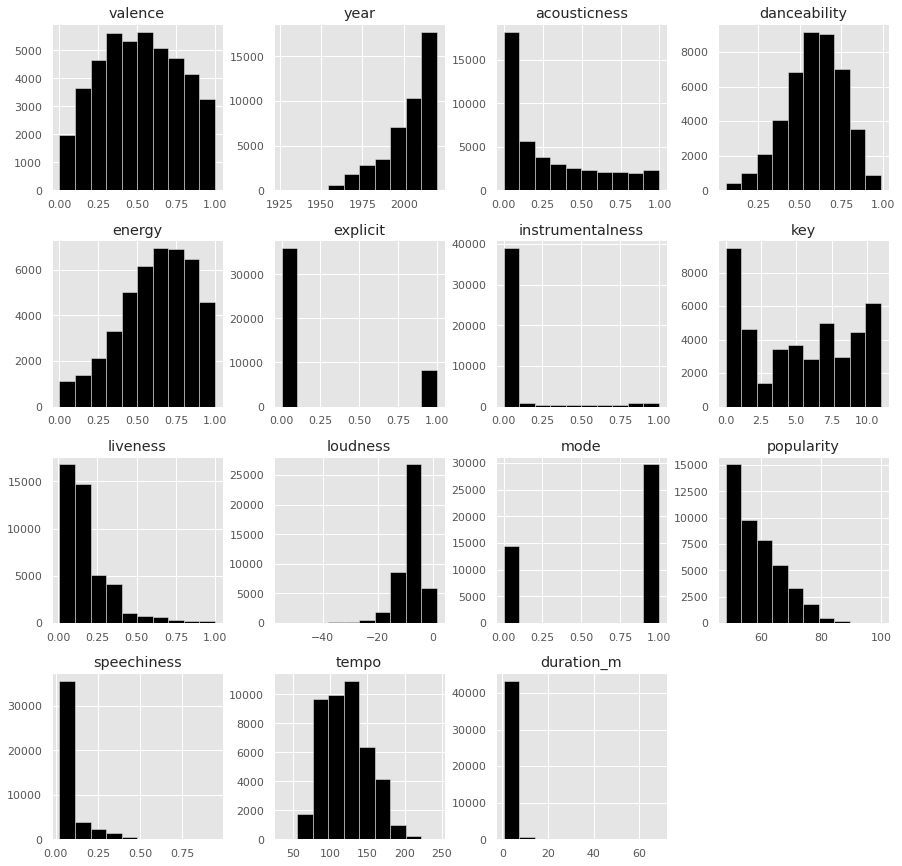

In [ ]:
poptr.hist(figsize=(15, 15), color = 'black')
plt.show()

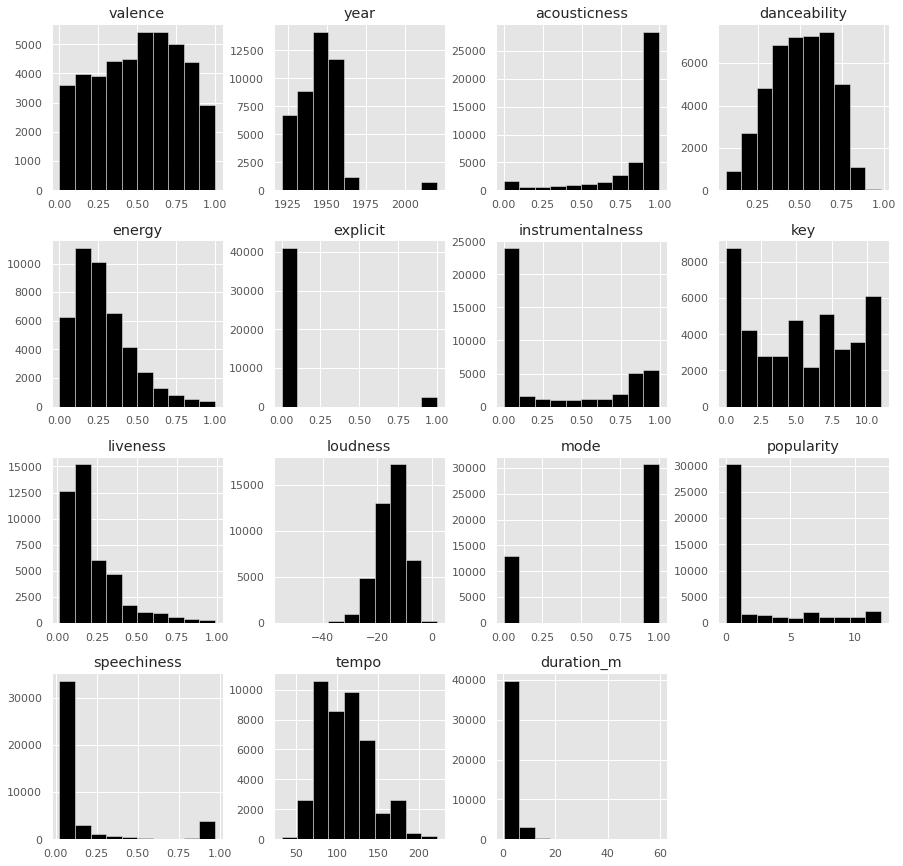

In [ ]:
unpoptr.hist(figsize=(15, 15), color = 'black')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f471354f7b8>]],
      dtype=object)

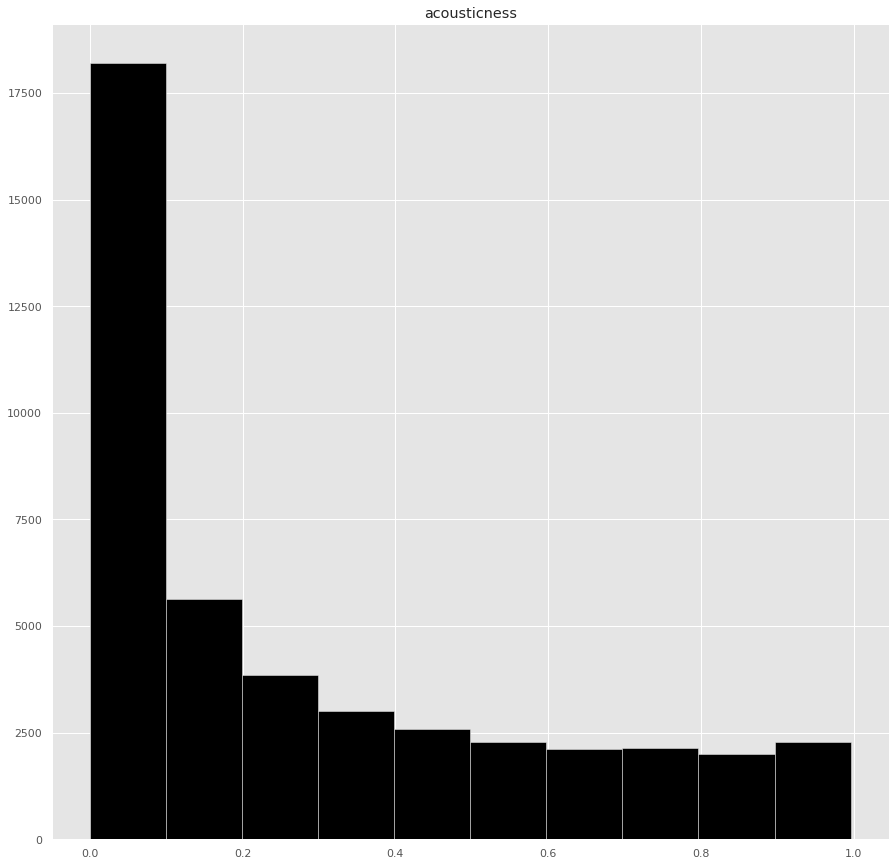

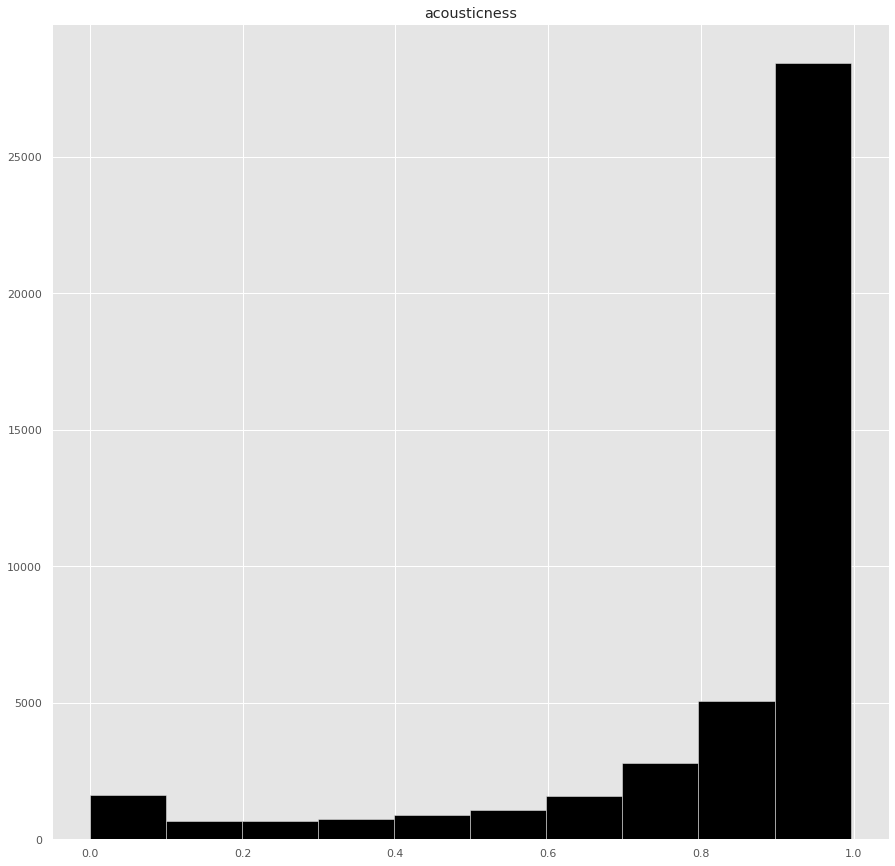

In [ ]:
poptr.hist(column='acousticness',figsize=(15, 15), color = 'black')
unpoptr.hist(column='acousticness',figsize=(15, 15), color = 'black')

Pada musik populer didominasi oleh musik non-akustik berbanding terbalik dengan musik non-populer didominasi oleh musik akustik

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47146b55c0>]],
      dtype=object)

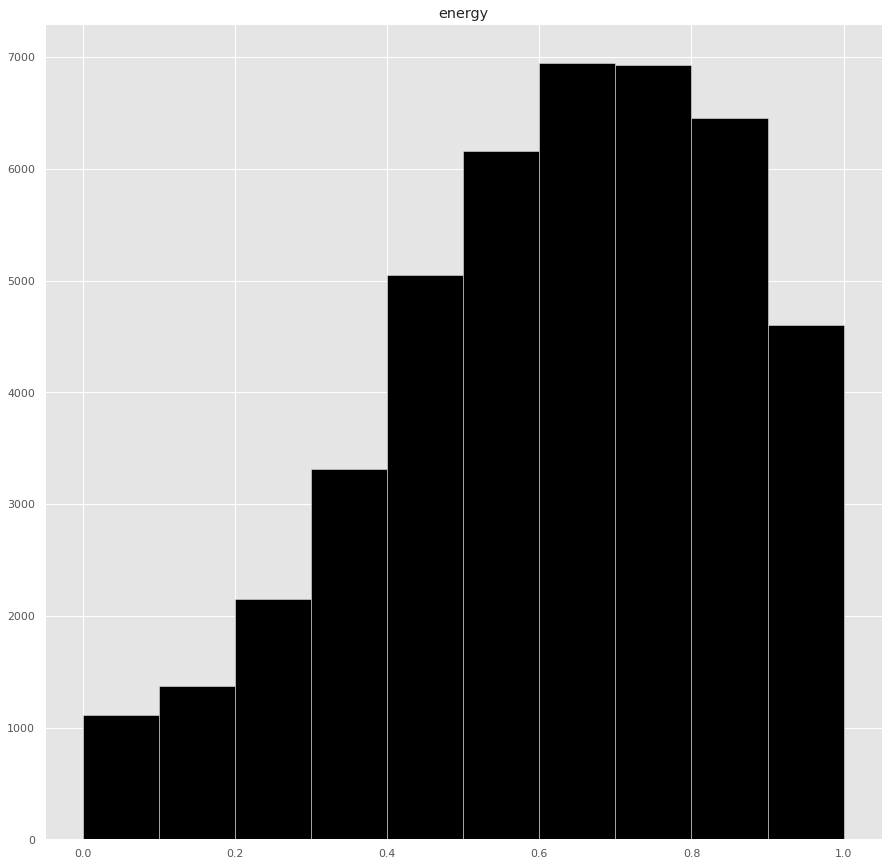

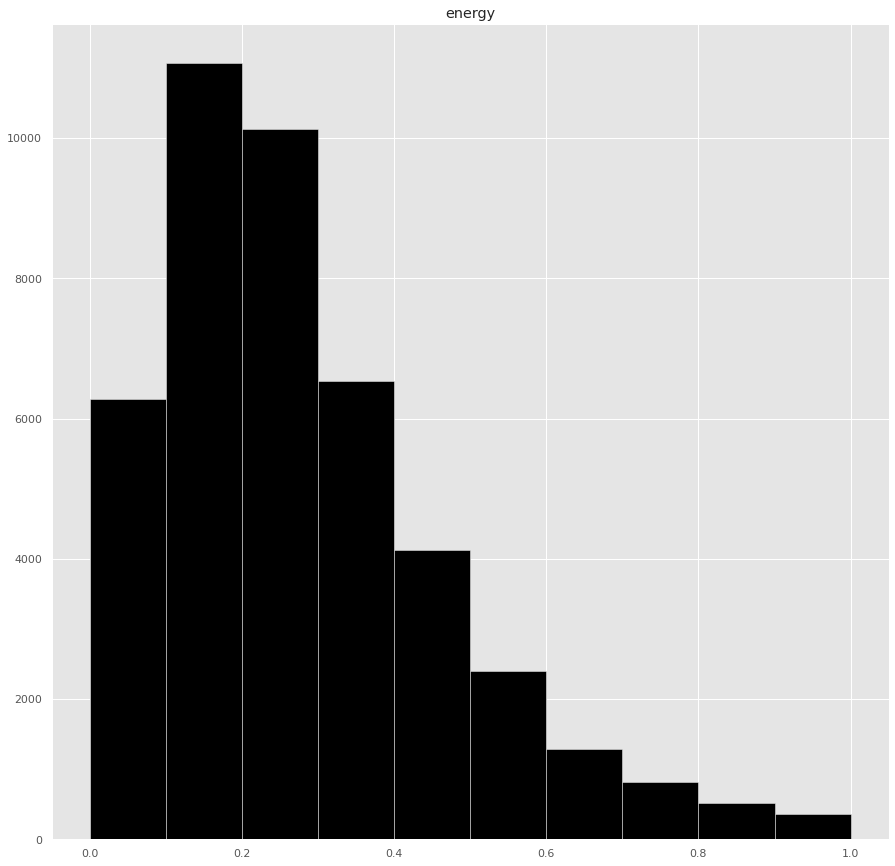

In [ ]:
poptr.hist(column='energy',figsize=(15, 15), color = 'black')
unpoptr.hist(column='energy',figsize=(15, 15), color = 'black')

Pada musik populer didominasi oleh musik berenergi (intensitas dan aktivitas) tinggi berbanding terbalik dengan musik non-populer didominasi oleh musik berenergi rendah

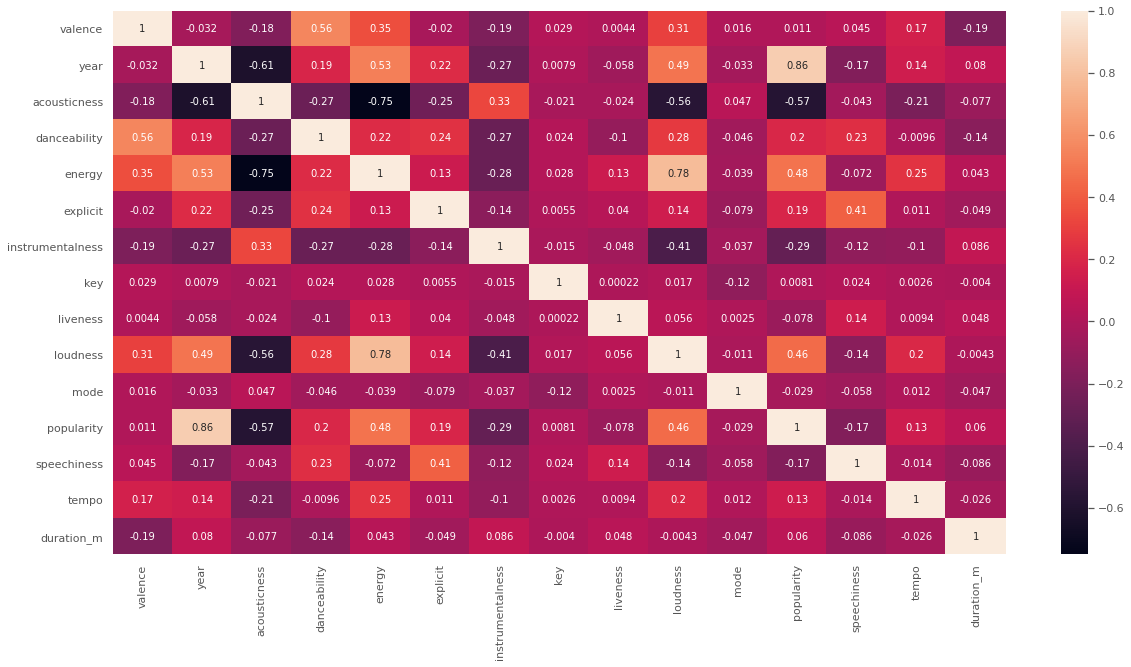

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(tracks.corr(),annot = True)

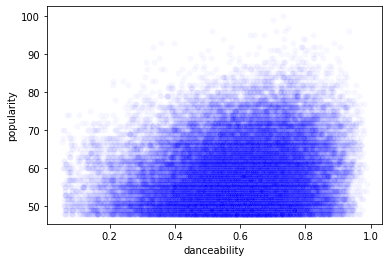

In [ ]:
sns.scatterplot(x = 'danceability', y = 'popularity', data = poptr, alpha = 0.03, color = 'blue')

Terdapat kolerasi positif antara danceability dan popularity. Semakin tinggi potensi untuk menari dengan lagu tersebut maka semakin tinggi popularitasnya

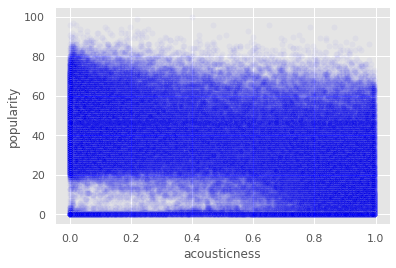

In [ ]:
sns.scatterplot(x = 'acousticness', y = 'popularity', data = tracks, alpha = 0.03, color = 'blue')

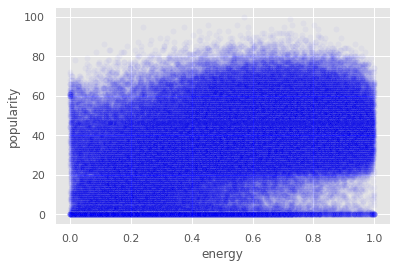

In [ ]:
sns.scatterplot(x = 'energy', y = 'popularity', data = tracks, alpha = 0.03, color = 'blue')

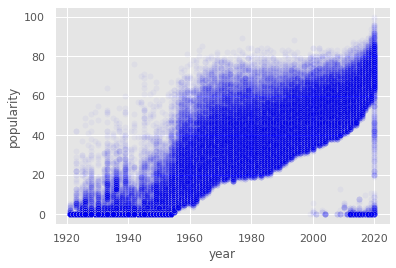

In [ ]:
sns.scatterplot(x = 'year', y = 'popularity', data = tracks, alpha = 0.03, color = 'blue')

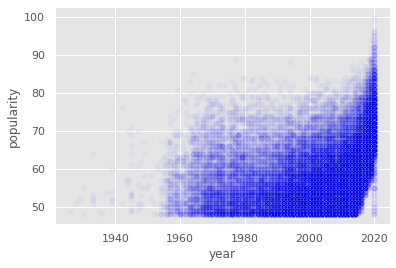

In [ ]:
sns.scatterplot(x = 'year', y = 'popularity', data = poptr, alpha = 0.03, color = 'blue')

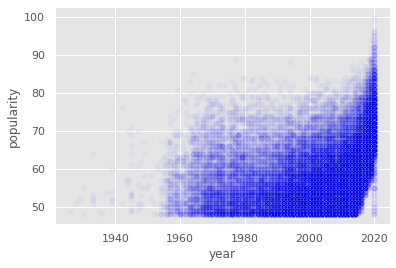

In [ ]:
sns.scatterplot(x = 'year', y = 'popularity', data = poptr, alpha = 0.03, color = 'blue')

In [ ]:
tracks

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_m
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954,13.861117
1,0.9630,1921,0.73200,['Dennis Day'],0.819,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936,3.008883
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,5,0.0339,110.339,8.334367
3,0.1650,1921,0.96700,['Frank Parker'],0.275,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,3,0.0354,100.109,3.500000
4,0.2530,1921,0.95700,['Phil Regan'],0.418,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665,2.778217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,0.808,0,0.000289,7,0.0822,-3.702,1,China,72,0.0881,105.029,5.028567
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,0.0605,137.936,2.510900
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,76,0.0809,91.688,3.521333
170651,0.1950,2020,0.00998,['Eminem'],0.671,0.623,1,0.000008,2,0.6430,-7.161,1,Darkness,70,0.3080,75.055,5.619117


In [ ]:
poptr.describe()

,valence,year,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,duration_m
count,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000,44096.000000
mean,0.516960,2002.869467,0.284779,0.589055,0.617322,0.185867,0.071323,5.236597,0.186406,-8.227449,0.674438,58.543519,0.085288,120.774446,3.893109
std,0.253618,14.881730,0.299735,0.169541,0.230013,0.389004,0.214305,3.555360,0.153514,4.648496,0.468590,8.233127,0.092716,29.919948,1.332974
min,0.000000,1926.000000,0.000000,0.055100,0.000103,0.000000,0.000000,0.000000,0.009670,-54.837000,0.000000,48.000000,0.022300,34.717000,0.505017
25%,0.316000,1995.000000,0.028300,0.480000,0.466000,0.000000,0.000000,2.000000,0.093900,-10.008000,0.000000,52.000000,0.034200,96.605000,3.181058
50%,0.515000,2007.000000,0.163000,0.599000,0.644000,0.000000,0.000008,5.000000,0.124000,-7.099000,1.000000,57.000000,0.046300,119.844000,3.731783
75%,0.723000,2015.000000,0.488000,0.713000,0.801000,0.000000,0.001790,8.000000,0.234000,-5.190000,1.000000,64.000000,0.088100,140.023000,4.376721
max,1.000000,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,0.997000,1.342000,1.000000,100.000000,0.944000,243.372000,68.670967


In [ ]:
tracks[tracks['popularity']>90]

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_m
19407,0.5570,2019,0.12200,['Harry Styles'],0.548,0.816,0,0.000000,0,0.3350,-4.209,1,Watermelon Sugar,94,0.0465,95.390,2.900000
19413,0.4460,2019,0.75100,['Lewis Capaldi'],0.501,0.405,0,0.000000,1,0.1050,-5.679,1,Someone You Loved,91,0.0319,109.891,3.036017
19426,0.6640,2019,0.22300,"['Topic', 'A7S']",0.789,0.720,0,0.000000,8,0.1290,-5.652,0,Breaking Me,92,0.2180,122.031,2.779900
19606,0.7560,2020,0.22100,"['24kGoldn', 'iann dior']",0.700,0.722,1,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,0.0369,90.989,2.342100
19607,0.3470,2020,0.11400,"['Pop Smoke', 'Lil Baby', 'DaBaby']",0.823,0.586,1,0.000000,6,0.1930,-6.606,0,For The Night (feat. Lil Baby & DaBaby),95,0.2000,125.971,3.174600
19608,0.3570,2020,0.01940,"['Cardi B', 'Megan Thee Stallion']",0.935,0.454,1,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,0.3750,133.073,3.125683
19609,0.5220,2020,0.24400,"['Drake', 'Lil Durk']",0.761,0.518,1,0.000035,0,0.1070,-8.871,1,Laugh Now Cry Later (feat. Lil Durk),93,0.1340,133.976,4.358217
19610,0.6820,2020,0.46800,['Ariana Grande'],0.737,0.802,1,0.000000,0,0.0931,-4.771,1,positions,96,0.0878,144.015,2.872083
19611,0.1450,2020,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.731,0.573,1,0.000052,4,0.1130,-10.059,0,Dakiti,100,0.0544,109.928,3.418167
19612,0.5430,2020,0.65000,['Pop Smoke'],0.709,0.548,1,0.000002,10,0.1330,-8.493,1,What You Know Bout Love,96,0.3530,83.995,2.666667


In [ ]:
year_avg = tracks[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year","explicit"]].\
groupby("year").mean().sort_values(by="year").reset_index()

year_avg

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,explicit
0,1921,0.886896,0.418597,0.231815,0.344878,0.205710,101.531493,0.379327,-17.048667,0.073662,0.046667
1,1922,0.938592,0.482042,0.237815,0.434195,0.240720,100.884521,0.535549,-19.275282,0.116655,0.000000
2,1923,0.957247,0.577341,0.262406,0.371733,0.227462,114.010730,0.625492,-14.129211,0.093949,0.000000
3,1924,0.939481,0.556974,0.346962,0.577959,0.235754,122.243515,0.672271,-14.135030,0.093275,0.000000
4,1925,0.962607,0.573863,0.278594,0.418297,0.237668,115.521921,0.621929,-14.146414,0.111918,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
95,2016,0.283488,0.602886,0.595313,0.092201,0.180768,119.183217,0.433462,-7.999961,0.104780,0.311347
96,2017,0.282405,0.619683,0.595105,0.089602,0.189845,118.632042,0.421555,-8.040607,0.111885,0.342480
97,2018,0.267270,0.664765,0.603533,0.053135,0.176291,122.154651,0.448775,-7.135668,0.127418,0.428776
98,2019,0.276928,0.647801,0.595658,0.074996,0.172101,120.802584,0.461046,-7.662127,0.121589,0.400413


In [ ]:
from sklearn.preprocessing import MinMaxScaler # for normalizing data
from sklearn.cluster import KMeans 
%matplotlib inline

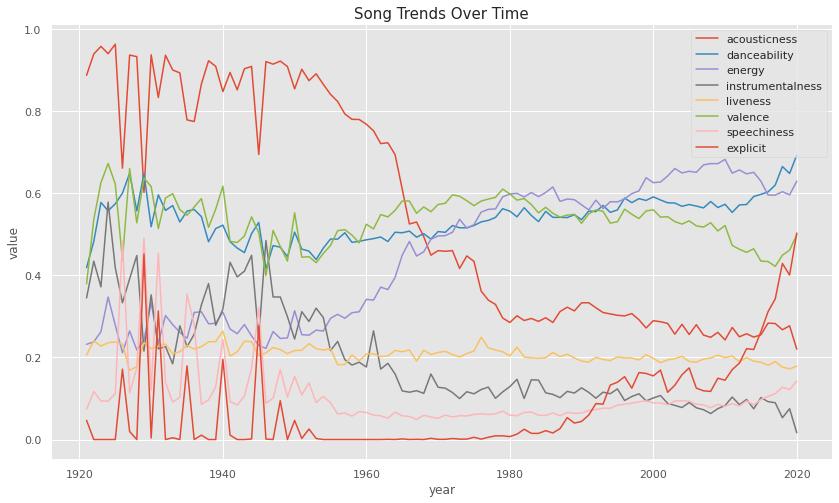

In [ ]:
# Create a line plot
plt.figure(figsize=(14,8))
plt.title("Song Trends Over Time", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness","explicit"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

*   Lagu-lagu akustik sejak tahun 1960 jumlahnya menurun 
*   Lagu-lagu dengan potensi untuk menari sejak tahun 2000 terus meningkat
*   Lagu-lagu dengan konten eksplisit dalam 10 tahun terakhir jumlahnya meningkat drastis

In [ ]:
popyear_avg = poptr[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year","explicit"]].\
groupby("year").mean().sort_values(by="year").reset_index()

popyear_avg

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,explicit
0,1926,0.821000,0.515000,0.222000,0.001930,0.190000,98.358000,0.350000,-16.918000,0.057500,0.000000
1,1928,0.847000,0.626000,0.744000,0.892000,0.145000,113.117000,0.259000,-9.189000,0.066200,0.000000
2,1929,0.586000,0.673000,0.377000,0.000000,0.332000,88.973000,0.713000,-14.141000,0.069700,0.000000
3,1930,0.899000,0.435000,0.345000,0.447850,0.463500,87.733500,0.272500,-12.920500,0.059600,0.000000
4,1933,0.962200,0.522800,0.210940,0.172813,0.149000,117.863200,0.478000,-12.754600,0.042280,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
82,2016,0.290502,0.599341,0.590709,0.079870,0.181025,118.961661,0.435482,-8.015445,0.105073,0.319173
83,2017,0.287530,0.619652,0.591523,0.083065,0.189588,118.495075,0.422213,-8.058538,0.112201,0.349429
84,2018,0.276976,0.665074,0.594302,0.034901,0.174674,121.894091,0.452035,-7.153221,0.129295,0.448898
85,2019,0.280758,0.651421,0.590047,0.056118,0.168463,120.640563,0.468262,-7.565417,0.122680,0.418706


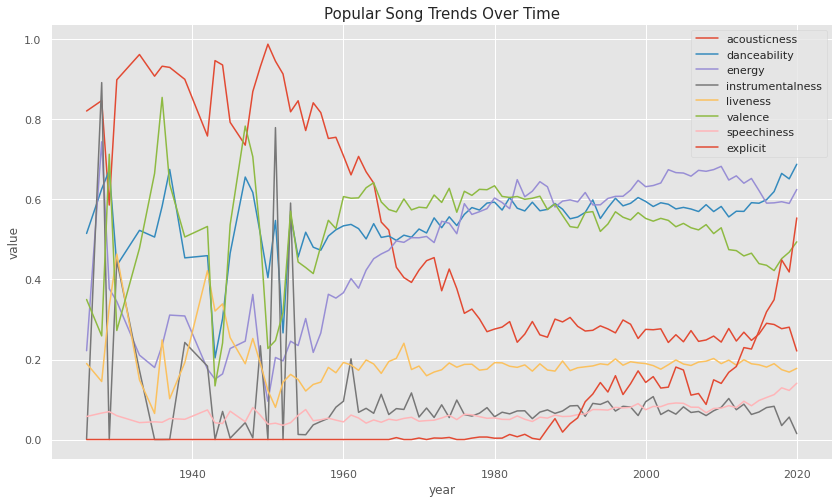

In [ ]:
# Create a line plot
plt.figure(figsize=(14,8))
plt.title("Popular Song Trends Over Time", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness","explicit"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=popyear_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

Text(0.5, 1.0, 'Explicit Content Over Time')

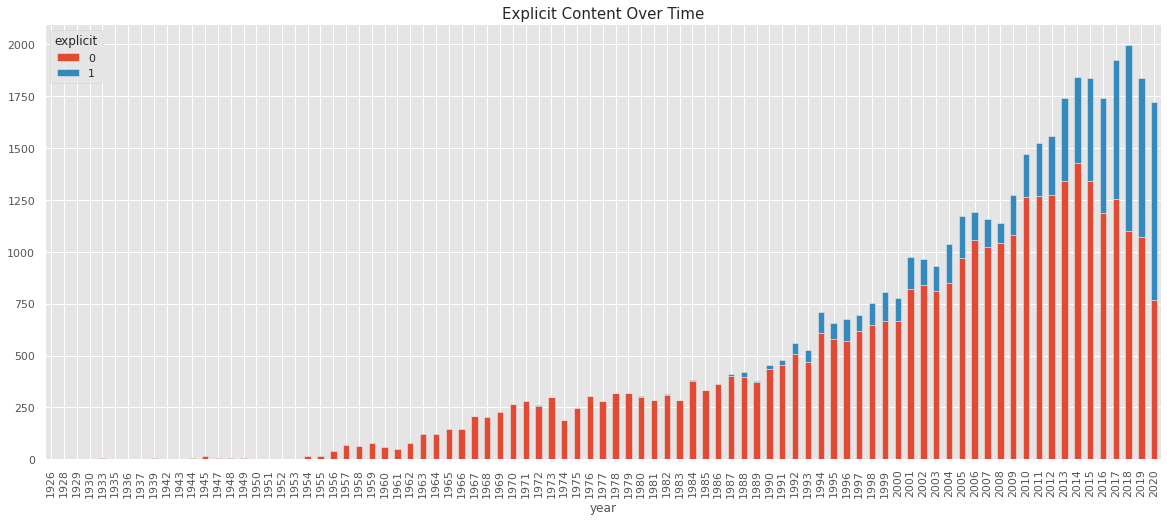

In [ ]:
test5 = poptr.groupby(['year', 'explicit'])['year'].count().unstack('explicit')

test5.plot(kind='bar', figsize=(20,8),stacked=True)
plt.title("Explicit Content Over Time", fontdict={"fontsize": 15})

Trend lagu dengan konten explicit selama 5 tahun terakhir sangat meningkat
Pada tahun 2020 jumlah lagu explicit dan tidak explicit hampir sama.

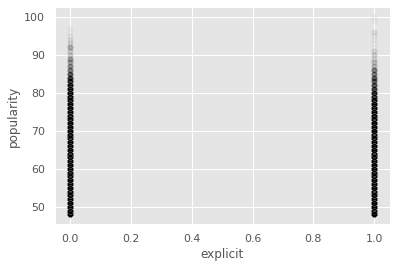

In [ ]:
sns.scatterplot(x = 'explicit', y = 'popularity', data = poptr, alpha = 0.03, color = 'black')

Tidak terdapat korelasi antara 
explicit dan popularity. 

In [ ]:
from sklearn import preprocessing as per

poptr_num = poptr[['acousticness','danceability', 'duration_m', 'energy', 'instrumentalness',
          'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','explicit','mode','popularity']]

In [ ]:
scaler = per.MinMaxScaler(feature_range=(0,1))
rescaleData = scaler.fit_transform(poptr_num)
rescaleData=pd.DataFrame(rescaleData, index= poptr_num.index, columns=poptr_num.columns)
rescaleData

,acousticness,danceability,duration_m,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,explicit,mode,popularity
806,0.824297,0.492979,0.050727,0.221920,0.001930,0.000000,0.182644,0.674968,0.038190,0.305006,0.350,0.0,0.0,0.019231
1206,0.850402,0.611963,0.119765,0.743974,0.892000,0.181818,0.137067,0.812546,0.047629,0.375740,0.259,0.0,0.0,0.057692
1406,0.588353,0.662343,0.041850,0.376936,0.000000,0.000000,0.326466,0.724399,0.051427,0.260027,0.713,0.0,1.0,0.076923
1606,0.814257,0.499410,0.062509,0.363934,0.009700,0.545455,0.135041,0.789316,0.045351,0.290034,0.377,0.0,0.0,0.134615
1607,0.990964,0.315039,0.125013,0.325931,0.886000,0.090909,0.784267,0.702932,0.035586,0.218140,0.168,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.084940,0.783471,0.066361,0.807980,0.000289,0.636364,0.073461,0.910216,0.071390,0.336977,0.608,0.0,1.0,0.461538
170649,0.206827,0.709508,0.029426,0.752975,0.000000,0.636364,0.092502,0.868955,0.041445,0.494687,0.734,0.0,1.0,0.384615
170650,0.101406,0.620538,0.044250,0.857985,0.000009,0.363636,0.251517,0.936489,0.063578,0.273039,0.637,0.0,0.0,0.538462
170651,0.010020,0.660199,0.075024,0.622961,0.000008,0.181818,0.641457,0.848645,0.309971,0.193324,0.195,1.0,1.0,0.423077


In [ ]:
import warnings; warnings.simplefilter('ignore')
plt.style.use('bmh'); sns.set()

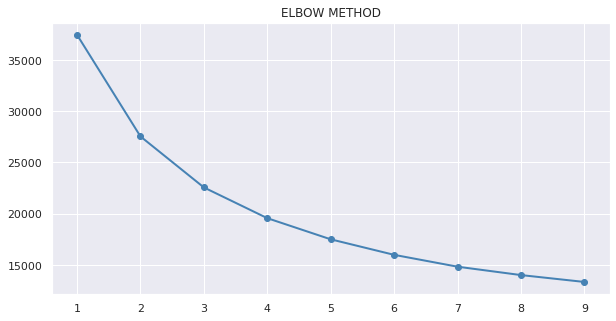

In [ ]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(rescaleData)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(1,10),inertias, marker='o', lw=2, color='steelblue');

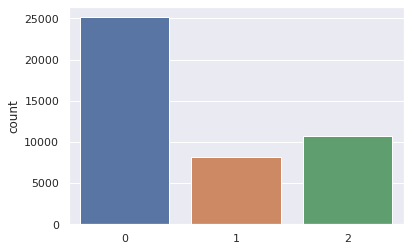

In [ ]:
#Implementasi K-Means dengan Jumlah Cluster k=3
k = 3
km_all = KMeans(n_clusters=k, init='random', max_iter=1000, tol=0.0001, n_jobs=-1, random_state = 99)
km_all.fit(rescaleData)
# Hasil clusteringnya
C_km_all = km_all.predict(rescaleData)
p= sns.countplot(C_km_all)

In [ ]:
import umap

In [ ]:
embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(rescaleData)

umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

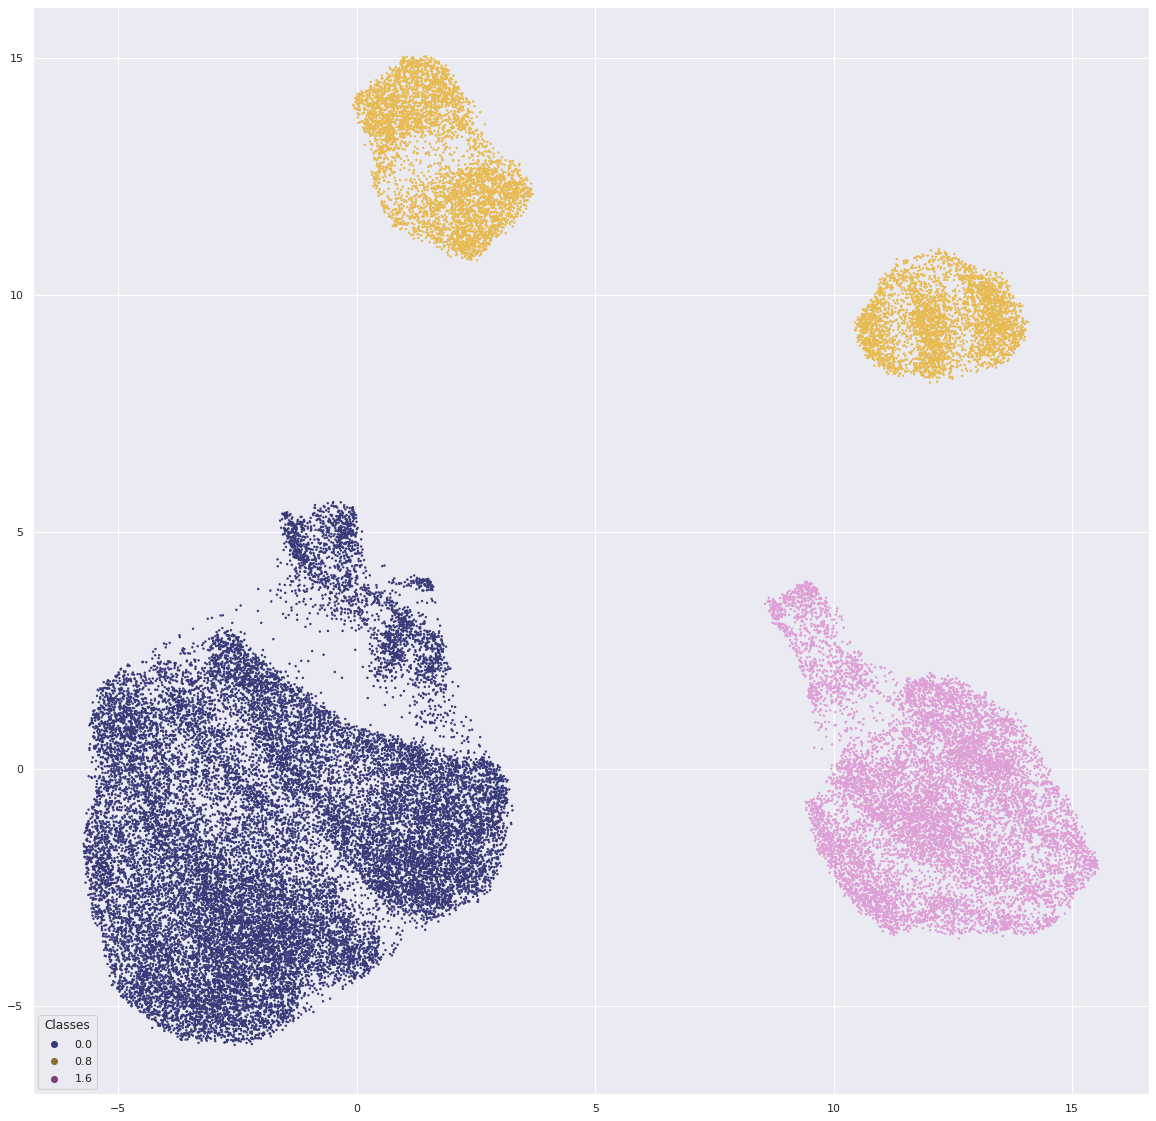

In [ ]:
#Visualisasi Hasil K-Means

fig, ax = plt.subplots()
fig.set_size_inches((20, 20))
scatter = ax.scatter(umap_component1, umap_component2, s=2, c=C_km_all, cmap='tab20b', alpha=1.0)

legend = ax.legend(*scatter.legend_elements(num=3),
                    loc="lower left", title="Classes")
ax.add_artist(legend)

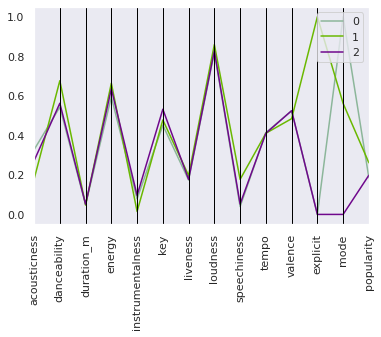

In [ ]:
cols =['acousticness','danceability', 'duration_m', 'energy', 'instrumentalness',
          'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','explicit','mode','popularity']
dfC = pd.DataFrame(km_all.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score as score
print(score(rescaleData,C_km_all), end=', ')

0.31228134654961104, 

In [ ]:
C_poptr = pd.concat([poptr_num.reset_index(drop=True), pd.DataFrame(C_km_all)], axis=1)
C_poptr['Cluster'] = km_all.labels_
C_poptr.drop(0,axis=1,inplace=True)
C_poptr

,acousticness,danceability,duration_m,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,explicit,mode,popularity,Cluster
0,0.82100,0.515,3.962883,0.222,0.001930,0,0.1900,-16.918,0.0575,98.358,0.350,0,0,49,2
1,0.84700,0.626,8.668883,0.744,0.892000,2,0.1450,-9.189,0.0662,113.117,0.259,0,0,51,2
2,0.58600,0.673,3.357783,0.377,0.000000,0,0.3320,-14.141,0.0697,88.973,0.713,0,1,52,0
3,0.81100,0.521,4.766033,0.364,0.009700,6,0.1430,-10.494,0.0641,95.234,0.377,0,0,55,2
4,0.98700,0.349,9.026667,0.326,0.886000,1,0.7840,-15.347,0.0551,80.233,0.168,0,1,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,0.08460,0.786,5.028567,0.808,0.000289,7,0.0822,-3.702,0.0881,105.029,0.608,0,1,72,0
44092,0.20600,0.717,2.510900,0.753,0.000000,7,0.1010,-6.020,0.0605,137.936,0.734,0,1,68,0
44093,0.10100,0.634,3.521333,0.858,0.000009,4,0.2580,-2.226,0.0809,91.688,0.637,0,0,76,2
44094,0.00998,0.671,5.619117,0.623,0.000008,2,0.6430,-7.161,0.3080,75.055,0.195,1,1,70,1


In [ ]:
C_poptr0=C_poptr[C_poptr['Cluster']==0]
C_poptr1=C_poptr[C_poptr['Cluster']==1]
C_poptr2=C_poptr[C_poptr['Cluster']==2]

In [ ]:
C_poptr0.drop('Cluster',axis=1,inplace=True)
C_poptr1.drop('Cluster',axis=1,inplace=True)
C_poptr2.drop('Cluster',axis=1,inplace=True)

In [ ]:
Cmean = pd.concat([C_poptr0.mean(),C_poptr1.mean(),C_poptr2.mean()], axis=1)
Cmean

,0,1,2
acousticness,0.326050,0.177355,0.270192
danceability,0.561428,0.686035,0.579730
duration_m,3.887638,3.714548,4.041861
energy,0.594489,0.663903,0.635179
instrumentalness,0.078901,0.014980,0.096528
key,4.966702,5.255490,5.852550
liveness,0.181305,0.204326,0.184672
loudness,-8.720253,-6.566546,-8.341279
speechiness,0.058830,0.185548,0.070733
tempo,121.082618,120.387501,120.349367


In [ ]:
df = pd.read_csv("/content/data_by_genres.csv")
df_2 = pd.read_csv("/content/data_w_genres.csv")

In [ ]:
out_cols = ["genres", "artists", "mode", "count", "key"]
in_cols = [x for x in df.columns if x not in out_cols] 

df = df.set_index("genres")[in_cols].drop("[]", 0)
df

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
genres,,,,,,,,,,,
21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071
abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000
...,...,...,...,...,...,...,...,...,...,...,...
zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943
zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000
zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667


In [ ]:
df_2.set_index("artists", inplace=True)
df_2["genres"][df_2["genres"] == "[]"] = np.nan
df_2["genres"] = df_2["genres"].fillna(0)
df_2

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
artists,,,,,,,,,,,,,,,
"""Cats"" 1981 Original London Cast",['show tunes'],0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
"""Cats"" 1983 Broadway Cast",0,0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
"""Fiddler On The Roof” Motion Picture Chorus",0,0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
"""Fiddler On The Roof” Motion Picture Orchestra",0,0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
"""Joseph And The Amazing Technicolor Dreamcoat"" 1991 London Cast",0,0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
麥志誠,0,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
黃品源,"['c-pop', 'classic cantopop', 'classic mandopo...",0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
黃國隆,0,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11


In [ ]:
!pip install ppscore
warnings.filterwarnings("ignore")
import ppscore as pps
import ast
from tqdm.notebook import tqdm

#visualisasi
from wordcloud import WordCloud
plt.style.use("ggplot")

#text preprocessing
import nltk
from nltk.corpus import stopwords

In [ ]:
#standardisasi
df_2_std = df_2.copy()
for col in in_cols:
    df_2_std[col] = (df_2[col]-df_2[col].mean())/df_2[col].std()

def str2list(x):
    try:
        return ast.literal_eval(x)
    except:
        return np.nan
       
#memisahkan genre-genre
df_2_std.reset_index(inplace = True)
collist = list(df_2_std.columns)
new_rows = []
for index in tqdm(range(len(df_2_std))):
    row = df_2_std.iloc[index]
    genre_list = str2list(row["genres"])
    row = pd.DataFrame(row).transpose()
    if(not(isinstance(genre_list, list) and len(genre_list) != 0)):
        pass
    else:
        if(len(genre_list) == 1):
            row["genres"] = genre_list[0]
            new_rows.append(list(row.values[0]))
        else:
            row = pd.concat([row for i in range(len(genre_list))], 0)
            row["genres"] = genre_list
            for i in range(len(genre_list)):
                new_rows.append(list(row.values[i]))
                
df_known = pd.DataFrame(new_rows, columns = collist)

In [ ]:
X_known = df_known[in_cols]
y_known = df_known["genres"]

In [ ]:
y_known.value_counts()[:10].to_dict()

{'country rock': 394,
 'dance pop': 572,
 'hip hop': 507,
 'modern rock': 400,
 'pop': 593,
 'pop rap': 482,
 'pop rock': 400,
 'rap': 516,
 'rock': 611,
 'urban contemporary': 383}

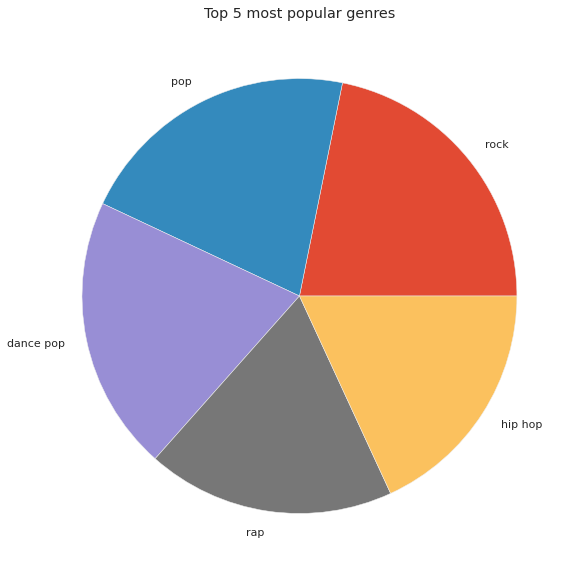

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
y_known.value_counts()[:5].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 5 most popular genres")
plt.show()

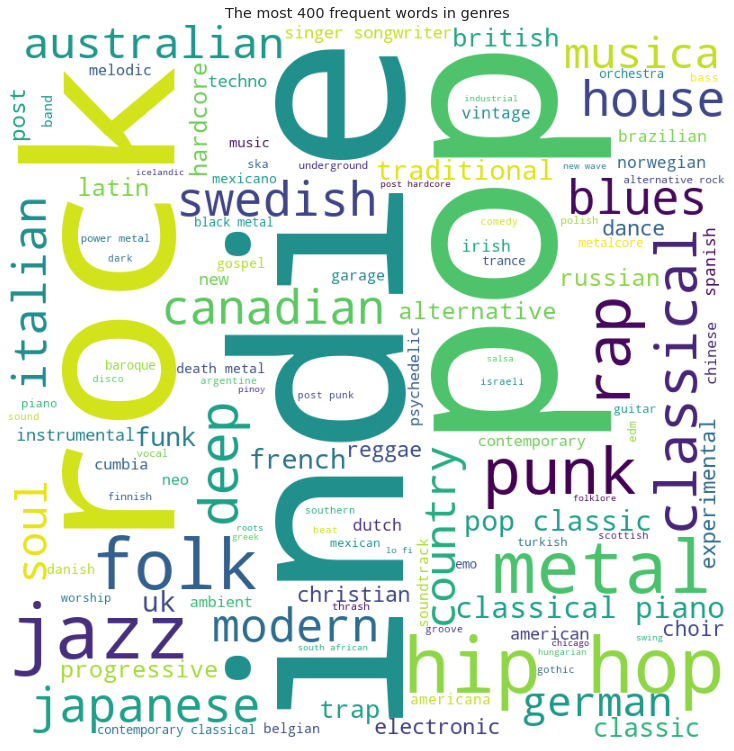

In [ ]:
max_words = 400
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', max_words = max_words, colormap="viridis",
                min_font_size = 10).generate(" ".join(df.index))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(f"The most {max_words} frequent words in genres")
plt.show()

Dengan mencari 400 kata yang paling sering muncul dalam genre, maka sekali lagi dapat dilihat bahwa genre yang paling diminati sepanjang masa oleh masyarakat dunia adalah genre pop dan rock. 

In [ ]:
import re
from collections import Counter
tracks = tracks.iloc[:,1:]

In [ ]:
def splitDataFrameList(df,target_column,delimiters):
    regexPattern = "|".join(map(re.escape,delimiters))
    def splitListToRows(row,row_accumulator,target_column,regexPattern):
        split_row = re.split(regexPattern,row[target_column])
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,regexPattern))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [ ]:
from ast import literal_eval
all_artists = tracks.copy()
all_artists['artists'] = all_artists['artists'].map(lambda x: literal_eval(x))
all_artists['artists'] = all_artists['artists'].map(lambda x: x[0])

In [ ]:
artists_count = all_artists.groupby('artists').count().iloc[:,0]
artists_count = artists_count.reset_index()
artists_count.columns = ['artists', 'count']
all_artists = pd.merge(all_artists, artists_count, on='artists')

In [ ]:
all_artists['count'] = all_artists['count'].astype(int)

In [ ]:
all_artists = all_artists[all_artists['count'] >= 50]

In [ ]:
df_2 = pd.read_csv("/content/data_w_genres.csv")

In [ ]:
data_w_genres = df_2[['artists', 'genres']]

In [ ]:
genres = pd.merge(all_artists, data_w_genres, on='artists')

In [ ]:
multiple_genres = splitDataFrameList(genres,'genres',',')
multiple_genres['genres'] = multiple_genres['genres'].map(lambda x: re.sub(r'\W+', '', x))

In [ ]:
multiple_genres = multiple_genres[multiple_genres.genres != '']

In [ ]:
genres_year = multiple_genres.groupby('year')['genres'].apply(list)
genres_year = genres_year.reset_index()

In [ ]:
genres_year['most_common'] = genres_year['genres'].map(lambda x: Counter(x).most_common(1)[0][0])
genres_year['count_mc'] = genres_year['genres'].map(lambda x: Counter(x).most_common(1)[0][1])    

In [ ]:
total_year = all_artists.groupby('year').count().iloc[:,1]
total_year = total_year.reset_index()
total_year.columns = ['year', 'total']

In [ ]:
genres_year = pd.merge(genres_year, total_year, on='year')

In [ ]:
genres_year['perc_mc'] = genres_year['count_mc'] / genres_year['total']

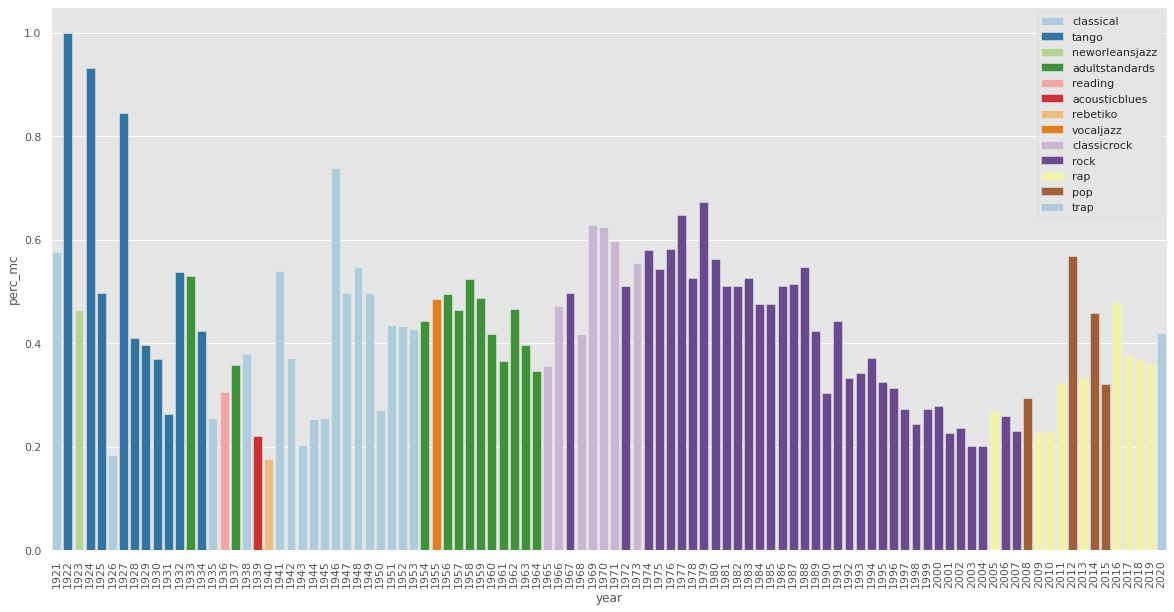

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.barplot(x='year',y='perc_mc',hue='most_common', data=genres_year, dodge=False, palette='Paired')
plt.xticks(rotation=90)
ax.legend(loc='upper right')
plt.show()

Selanjutnya, kita akan melihat genre-genre yang paling popular di setiap tahunnya. Dapat dilihat bahwa dari tahun 1920-1934, genre yang paling diminati adalah genre tango. Lalu, di tahun 1935-1950an genre yang paling popular adalah genre trap. Dan di tahun 50-an sampai 60-an, genre yang paling diminati adalah genre adultstandard; jazz, swing, pop tradisional. Selanjutnya di tahun 70an sampai 2000 genre yang paling diminati dan paling populer adalah genre rock. Dan untuk 10 tahun terakhir, genre yang paling popular dan diminati oleh masyarakat dunia adalah genre rap. Selanjutnya, di tahun 2020 yang paling popular adalah genre trap. 
